# CUNY MSDS DATA618 - Quantative Finance

## Week 4 : Brain Stumper 

### Deepak Sharma
---------------------
The following Investopedia post (https://www.investopedia.com/ask/answers/06/oilpricesinflation.asp) posits a reduced influence of oil prices on inflation today compared to the past 

You should be able to demonstrate (or refute) this assertion by measuring the degree of correlation of inflation measures (CPI and/or PPI) and the price of oil and/or motor fuel costs over time.

__Challenge:__

1. Source monthly oil and motor fuel price data for a significant period (~ 30 years or longer) from a reputable source (E.g.: US Energy Information Administration - https://www.eia.gov/)
2. Source inflation rate (CPI and PPI) data from an authoritative source (E.g.: US Bureau of Labor Statistics - https://www.bls.gov/)
3. Determine and plot the correlation between energy costs and inflation and demonstrate its change over the period studied.
4. Provide an assessment of the causes for the changes.
5. Commit your analyses, code used, results and summary presentation in your personal repo and send me links to your work in response to this email.

### Solution

__1.__

Monthly motor fuel price data is sourced from https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=emm_epm0_pte_nus_dpg&f=m

Uploaded the data on github - https://raw.githubusercontent.com/CUNY-SPS-Data-Science-Program/set-up-yathdeep/main/BrainStumpers-4/U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices.csv

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
gas_prices = pd.read_csv("https://raw.githubusercontent.com/CUNY-SPS-Data-Science-Program/set-up-yathdeep/main/BrainStumpers-4/U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices.csv",
                     skiprows = 4,parse_dates = ['Month'])
gas_prices.head()

,Month,U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon
0,2022-09-01,3.817
1,2022-08-01,4.087
2,2022-07-01,4.668
3,2022-06-01,5.032
4,2022-05-01,4.545


In [18]:
# Renamed the gasoline price dollar per gallon column and created index on data
gas_prices = gas_prices.rename(columns={'Month': 'Date', 'U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon': 'Oil'})
gas_prices.set_index('Date',inplace = True)
gas_prices.sort_values(by='Date',ascending = True, inplace=True)
gas_prices=gas_prices.iloc[1:] 
gas_prices.head()

,Oil
Date,
1993-05-01,1.100
1993-06-01,1.097
1993-07-01,1.078
1993-08-01,1.062
1993-09-01,1.050


<AxesSubplot:xlabel='Date'>

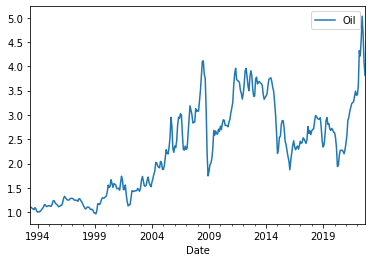

In [417]:
# Plot Oil prices $ per gallon 
#from the plot we can see that the Oil prices fell in June 2008 to February 2009. The lower price for oil and gas due to the financial crisis was the major impact on the sector.
gas_prices.plot()

__2.__

Lets download the Bureau of Labor Statistics Consumer Price Index Dataset from the site
https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/

Lets load the dataset. This dataset is a time series data.

In [20]:
cpidata = pd.read_csv("https://raw.githubusercontent.com/CUNY-SPS-Data-Science-Program/set-up-yathdeep/main/BrainStumpers-4/SeriesReport-20221003223734_12c428.csv",
                     skiprows = 1)
cpidata.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1993,0.4,0.2,0.1,0.3,0.3,0.1,0.1,0.2,0.1,0.4,0.3,0.2
1,1994,0.0,0.3,0.3,0.1,0.2,0.3,0.3,0.4,0.2,0.1,0.3,0.2
2,1995,0.3,0.3,0.2,0.4,0.2,0.2,0.1,0.2,0.1,0.3,0.1,0.1
3,1996,0.5,0.2,0.3,0.4,0.2,0.2,0.2,0.1,0.3,0.3,0.3,0.3
4,1997,0.2,0.2,0.1,0.1,0.0,0.2,0.1,0.2,0.2,0.2,0.1,0.1


In [36]:
# stack year-as-row, month-as-column data into a series

df1 = pd.melt(cpidata, id_vars=['Year'], var_name=['Month'])
df1['Date'] = pd.to_datetime(df1['Year'].astype(str) + '-' + df1['Month'].astype(str))
df1 = df1.sort_values(by=['Date']).drop(columns=['Month', 'Year']).reset_index(drop=['index'])
df1 = df1.rename(columns={'value': 'CPI'})
#print(df1)

col_name="Date"
first_col_Date = df1.pop(col_name)
df1.insert(0, col_name, first_col_Date)
df1=df1.set_index('Date', inplace = False).sort_values(by='Date')
print(df1)

            CPI
Date           
1993-01-01  0.4
1993-02-01  0.2
1993-03-01  0.1
1993-04-01  0.3
1993-05-01  0.3
...         ...
2022-08-01  0.1
2022-09-01  NaN
2022-10-01  NaN
2022-11-01  NaN
2022-12-01  NaN

[360 rows x 1 columns]


<AxesSubplot:xlabel='Date'>

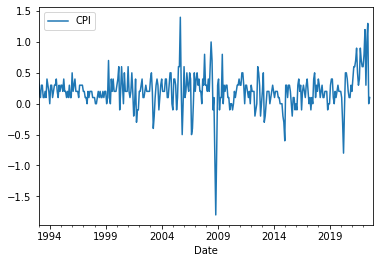

In [37]:
df1.plot()

In [38]:
gasoline_prices_cpi=pd.merge(gas_prices,df1,on='Date')
gasoline_prices_cpi.head()

,Oil,CPI
Date,,
1993-05-01,1.100,0.3
1993-06-01,1.097,0.1
1993-07-01,1.078,0.1
1993-08-01,1.062,0.2
1993-09-01,1.050,0.1


CPI vs Oil Prices

is there any correlation between energy costs and inflation  

Text(0, 0.5, 'Consumer Price Index(CPI)')

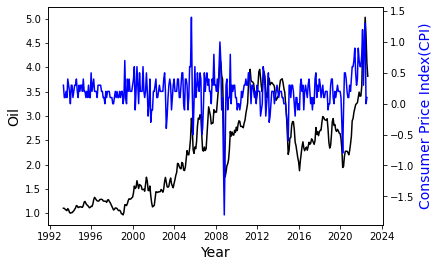

In [41]:
fig,ax = plt.subplots()
ax.plot(gasoline_prices_cpi.index,gasoline_prices_cpi.Oil, color='black')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Oil', color='black', fontsize=14)

ax2 = ax.twinx()

ax2.plot(gasoline_prices_cpi.index,gasoline_prices_cpi.CPI, color='blue')
ax2.set_ylabel('Consumer Price Index(CPI)', color='blue', fontsize=14)

PPI vs Oil Prices

is there any correlation between energy costs and PPI 

In [46]:
# Access PPI data and create index 
ppi_data = pd.read_csv("https://raw.githubusercontent.com/CUNY-SPS-Data-Science-Program/set-up-yathdeep/main/BrainStumpers-4/PPIACO.csv",
                     skiprows = 0,parse_dates = ['DATE'])
ppi_data = ppi_data.rename(columns={'DATE': 'Date','PPIACO':'PPI' })
ppi_data=ppi_data.set_index('Date', inplace = False)
ppi_data=ppi_data.iloc[3:len(ppi_data)-1] # remove extra rows
ppi_data.head()

,PPI
Date,
1993-04-01,119.3
1993-05-01,119.7
1993-06-01,119.5
1993-07-01,119.2
1993-08-01,118.7


<AxesSubplot:xlabel='Date'>

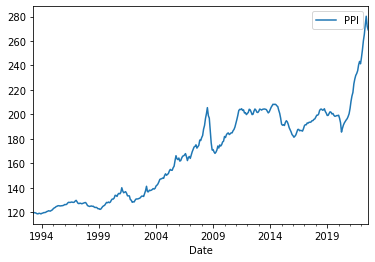

In [47]:
ppi_data.plot()

Text(0, 0.5, 'Producer Price Indexes(PPI)')

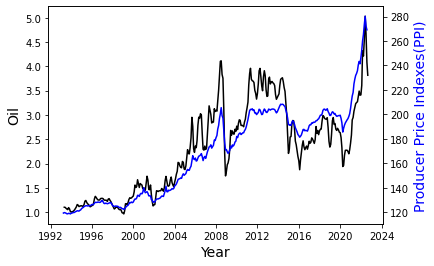

In [48]:
fig,ax = plt.subplots()
ax.plot(gas_prices.index,gas_prices.Oil, color='black')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Oil', color='black', fontsize=14)

ax2 = ax.twinx()

ax2.plot(ppi_data.index,ppi_data.PPI, color='blue')
ax2.set_ylabel('Producer Price Indexes(PPI)', color='blue', fontsize=14)

In [50]:
# Lets calculate corelation between Gasoline prices and CPI
gasoline_prices_cpi.corr()

,Oil,CPI
Oil,1.000000,0.156362
CPI,0.156362,1.000000


In [51]:
gasoline_prices_ppi=pd.merge(gas_prices,ppi_data,on='Date')
gasoline_prices_ppi.head()

,Oil,PPI
Date,,
1993-05-01,1.100,119.7
1993-06-01,1.097,119.5
1993-07-01,1.078,119.2
1993-08-01,1.062,118.7
1993-09-01,1.050,118.7


In [53]:
# Lets calculate corelation between Gasoline prices and PPI
gasoline_prices_ppi.corr()

,Oil,PPI
Oil,1.000000,0.916929
PPI,0.916929,1.000000


------------------------------------------------------
__3. Assessment of the causes for the changes__

__*Gasoline Prices vs CPI*__ 
-  shows a small positive but marginal correlation.

-  This weaker link between oil prices and consumer prices likely comes from Energy goods and services, a category of which gasoline is a major component, accounts for roughly 7.5% of the overall CPI.



__*Gasoline Prices vs PPI*__ : 
- The graph shows a strong positive relationship between oil prices and PPI inflation. That is, higher oil prices are associated with higher producer prices and vice versa. 
- Specifically, the correlation between oil prices and the PPI is __0.91__. This strong is because PPI measures the price of goods at the wholesale level. In addition to the demand for oil to produce a host of products plus its use by the transportation industry, other factors that can cause oil prices to rise include geopolitical tensions, tight supply, and growing economic strength. 
